# Part II - Prosper Loan Data
## by prosperLoanData.csv

## Investigation Overview
**What factors affect a loan's outcome status?**   
* I chose the **LoanStatus** column as the main column to focus on finding relevant data for the question.
* Use the file 'Prosper Loan Data.xslx' to better understand the dataset, select columns whose descriptions are supposed to be related to  
* Next, clean data feels inappropriate (null many, incorrect data...)  
* Univariate analysis  
* Discover relationships between variables for **LoanStatus**, model and visualize with charts.  
* Binary analysis  
* Create a relationship between **LoanStatus** with variables of type categories, and number.  
* Comments and conclusions after displaying relationships by chart.  
* Multivariate analysis  
* The final step of data analysis and modeling, creating multivariate relationships between **LoanStatus** and the remaining variables, modeling by plot.  
* After modeling I have seen more clearly the relationship of the **LoanStatus** variable with the rest of the variables.    
## Dataset Overview  
Introduce the dataset Loan Data from Prosper: This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others  

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import rcParams
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
# Function show info, shape, nunique of dataframe
def info_shape_df(df):
    """Function show info, shape, nunique of dataframe.
    """
    print('Info DataFrame: ')
    df.info()
    print(f'Total Row DF:\n {df.shape}')
    print(f'Unique Value OF DataFrame:\n{df.nunique()}')

In [3]:
# Function set title, xlabel, ylabel Plot
def plotFunction(plt, Title, xLabel, yLabel):
    """Function set title, xlabel, ylabel plot"""
    plt.title(Title, fontsize = 20)
    plt.xlabel(xLabel, fontsize = 14)
    plt.ylabel(yLabel, fontsize = 14)

In [4]:
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,8/14/2009 0:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,12/17/2009 0:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
# Define column will use for project
columns = ['ListingKey',
 'LoanStatus',
 'BorrowerAPR',
 'BorrowerRate',
 'LenderYield',
 'ProsperScore',
 'EmploymentStatus',
 'IncomeRange',
 'LoanCurrentDaysDelinquent',
 'LoanMonthsSinceOrigination',
 'LoanOriginalAmount',
 'LoanOriginationDate']

In [6]:
df = df[columns]
info_shape_df(df)

Info DataFrame: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 12 columns):
ListingKey                    113937 non-null object
LoanStatus                    113937 non-null object
BorrowerAPR                   113912 non-null float64
BorrowerRate                  113937 non-null float64
LenderYield                   113937 non-null float64
ProsperScore                  84853 non-null float64
EmploymentStatus              111682 non-null object
IncomeRange                   113937 non-null object
LoanCurrentDaysDelinquent     113937 non-null int64
LoanMonthsSinceOrigination    113937 non-null int64
LoanOriginalAmount            113937 non-null int64
LoanOriginationDate           113937 non-null object
dtypes: float64(4), int64(3), object(5)
memory usage: 10.4+ MB
Total Row DF:
 (113937, 12)
Unique Value OF DataFrame:
ListingKey                    113048
LoanStatus                        12
BorrowerAPR                     6677
Borrowe

### Clean Data
**I will take ListingKey as primary key, and simple clean check for duplicate, value must be number and alphabet**

In [7]:
# Check ListingKey duplicated
df[df.ListingKey.duplicated()].index
# Drop ListingKey duplicated
df.drop_duplicates(subset = 'ListingKey', inplace = True)
# Check DataFrame after delete
df[df.ListingKey.duplicated()]
# Check data ListingKey
df[df.ListingKey.str.contains('^[a-zA-Z0-9_.-]*$', regex = True) == False]
index_delete = df[df.ListingKey.str.contains('^[a-zA-Z0-9_.-]*$', regex = True) == False].index
# Drop ListingKey invalid
df.drop(index = index_delete, inplace = True)
# Check DataFrame after delete
df[df.ListingKey.str.contains('^[a-zA-Z0-9_.-]*$', regex = True) == False]

,ListingKey,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ProsperScore,EmploymentStatus,IncomeRange,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanOriginalAmount,LoanOriginationDate


In [8]:
# convert type IncomeRange, LoanStatus, EmploymentStatus
ordinal_var_dict = {
    'IncomeRange': df.IncomeRange.value_counts().index,
    'LoanStatus': df.LoanStatus.value_counts().index,
    'EmploymentStatus': df.EmploymentStatus.value_counts().index
}
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

In [9]:
info_shape_df(df)

Info DataFrame: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 111779 entries, 0 to 113936
Data columns (total 12 columns):
ListingKey                    111779 non-null object
LoanStatus                    111779 non-null category
BorrowerAPR                   111754 non-null float64
BorrowerRate                  111779 non-null float64
LenderYield                   111779 non-null float64
ProsperScore                  83035 non-null float64
EmploymentStatus              109546 non-null category
IncomeRange                   111779 non-null category
LoanCurrentDaysDelinquent     111779 non-null int64
LoanMonthsSinceOrigination    111779 non-null int64
LoanOriginalAmount            111779 non-null int64
LoanOriginationDate           111779 non-null object
dtypes: category(3), float64(4), int64(3), object(2)
memory usage: 8.8+ MB
Total Row DF:
 (111779, 12)
Unique Value OF DataFrame:
ListingKey                    111779
LoanStatus                        12
BorrowerAPR               

## (Visualization 2)
### Univariate Exploration


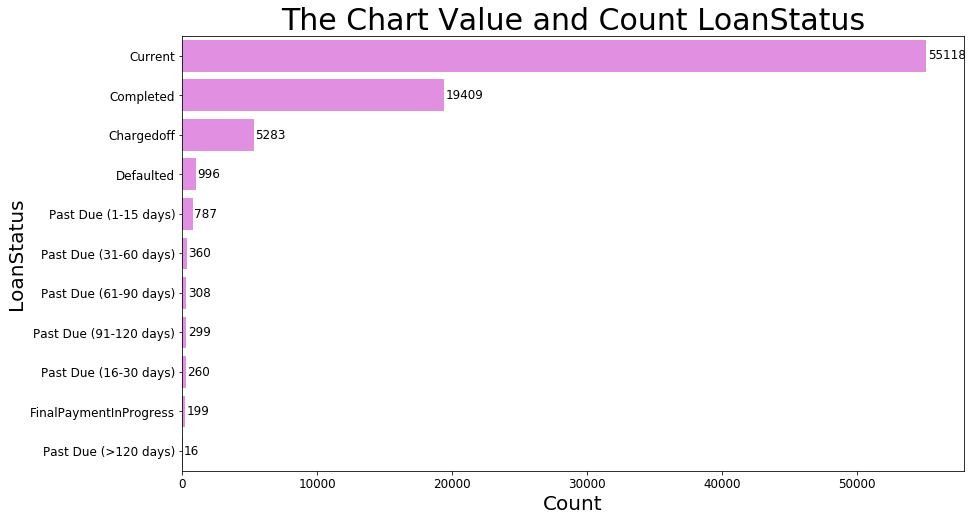

In [26]:
# Show chart value and count LoanStatus
# base_color = sb.color_palette()[0]
counts = df.LoanStatus.value_counts()
order = df.LoanStatus.value_counts().index
ax = sb.countplot(data = df, y = 'LoanStatus', color='violet', order = order)
ax.axes.set_title("The Chart Value and Count LoanStatus",fontsize=30)
ax.set_xlabel("Count",fontsize=20)
ax.set_ylabel("LoanStatus",fontsize=20)
ax.tick_params(labelsize=12)
rcParams['figure.figsize'] = 14, 8
# Logic to print the proportion text on the bars
for i in range (counts.shape[0]):
    count = counts[i]
    plt.text(count+100, i, count, va='center', fontsize = 12)
    
plt.show();

There are a total of 12 loan status.  
The most occupied is the current(55118)  
2nd is complete(37588)  
The third is chargeoff(11877)  
The remaining states seem to be insignificant  

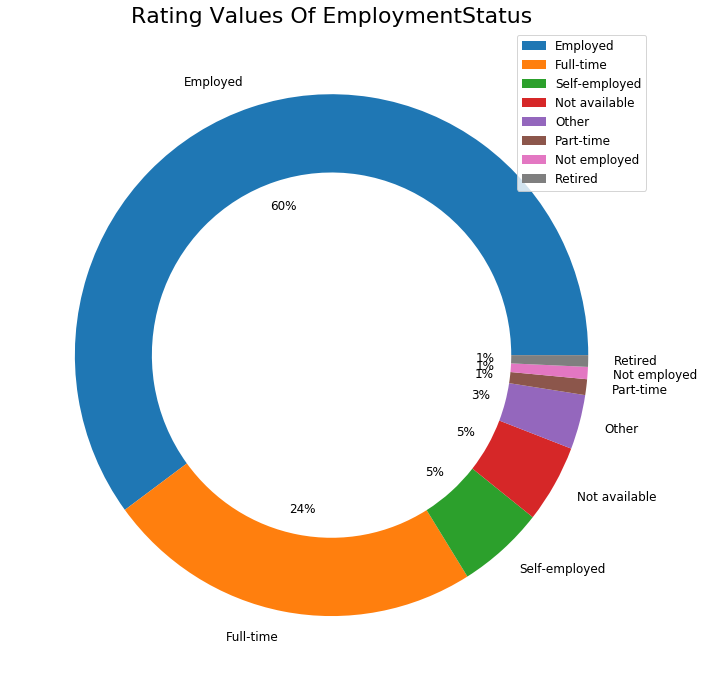

In [11]:
# Show chart Rating Values Of EmploymentStatus
chart_employee = pd.DataFrame(
    {
        'value': df.EmploymentStatus.value_counts().values
    },
    index = df.EmploymentStatus.value_counts().index
)
chart_employee.plot(kind = 'pie', y = 'value', figsize = (11.5,12), autopct = '%1.0f%%', 
                    textprops={'fontsize': 12}, wedgeprops = {'width' : 0.3}
                   )
plt.ylabel('')
plt.legend(loc='upper right', fontsize = 12)
plt.title('Rating Values Of EmploymentStatus', fontsize = 22);

There are a total of 8 EmployeeStatus.  
Occupying the most is Employed (60%)  
Second is Fulltime (24%)  
The third with the same value is Self-employed and Not available(5%)  
More than 80% of borrowers have jobs and income, but it is not enough to assess whether it affects LoanStatus or not.  

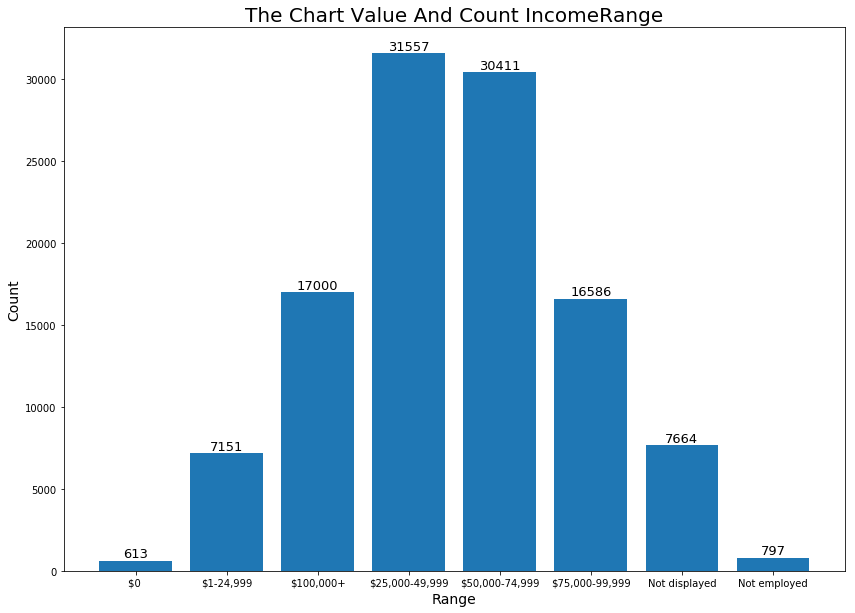

In [12]:
# Show chart Rating Values Of IncomeRange
x = df.IncomeRange.value_counts().index
y = df.IncomeRange.value_counts().values    
ax = plt.figure(figsize = (14, 10))

# making the bar chart on the data
plt.bar(x, y)
# Display value of range
for i, value in enumerate(y):
    plt.text(x = x[i], y = value + 200, s = y[i], ha = 'center', fontsize = 13)
    
# Call plotFunction
plotFunction(plt, 'The Chart Value And Count IncomeRange', 'Range', 'Count')
# visualizing the plot
plt.show()

There are a total of 8 IncomeRange.  
The most is 25,000-49,999 USD(31557)  
Monday is 50,000-74,999 USD(30411)  
The third value is roughly equal to 100,000 USD(17000) respectively 75,000-99,999 USD(16586)  
Income range is a very important factor for borrowers to be approved for a loan application.  

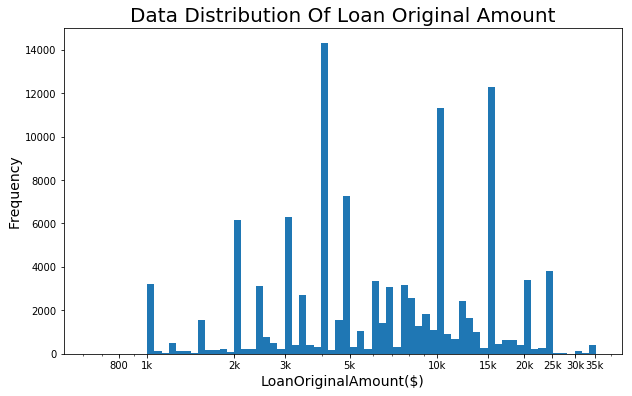

In [13]:
# Show distribute data LoanOriginalAmount by xscale
log_binsize = 0.025
bins = 10 ** np.arange(2.8, np.log10(df['LoanOriginalAmount'].max())+log_binsize, log_binsize)
# print(bins)
plt.figure(figsize=[10, 6])
plt.hist(data = df, x = 'LoanOriginalAmount', bins = bins)
plt.xscale('log')
plt.xticks([800,1e3,2e3,3e3, 5e3, 1e4, 1.5e4, 2e4, 2.5e4, 3e4, 3.5e4], [800,'1k','2k','3k', '5k', '10k','15k','20k','25k','30k','35k'])

# Call plotFunction
plotFunction(plt, 'Data Distribution Of Loan Original Amount', 'LoanOriginalAmount($)', 'Frequency')
plt.show()

Loans range from 1k-35k.  
The highest is about 2k, 3k, 5k, 10k, 15k  
In those intervals, spread evenly  
Very few loans from 25k onwards  

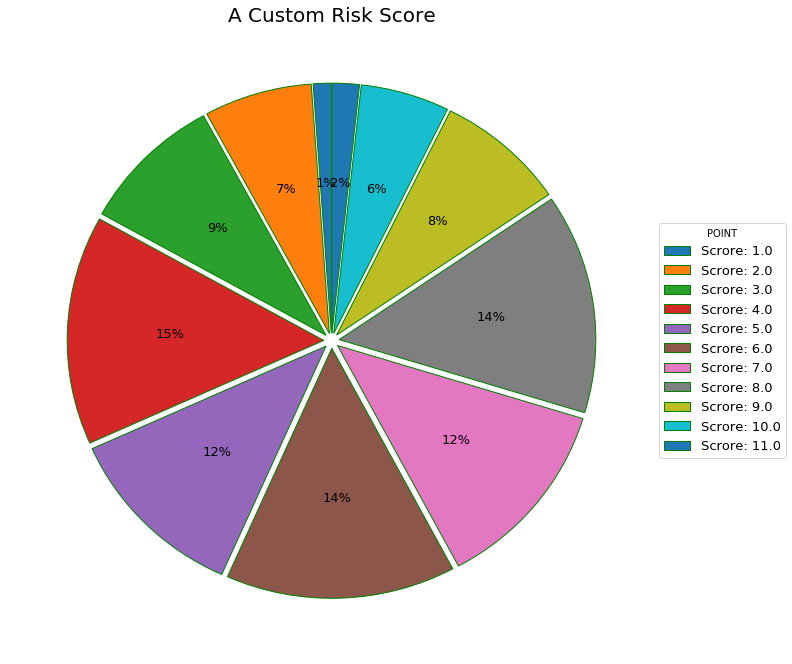

In [29]:
prosper_score = df.ProsperScore.value_counts().sort_index()
prosper_score
# Show Chart Ratio Value Of ProsperScore
note = prosper_score.index
data = prosper_score.values
# Creating explode data
explode = (0.03,
0.03,
0.03,
0.03,
0.03,
0.03,
0.03,
0.03,
0.03,
0.03,
0.03)
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
# Creating color parameters
colors = ( "orange", "cyan", "brown",
          "red", "indigo", "beige",
          "navy", "pink", "yellow",
          "Chartreuse","blueviolet"
         )
# Creating plot
fig, ax = plt.subplots(figsize =(11.5, 11.5))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = '%1.0f%%',
                                  explode = explode,
                                  labels = None,
#                                   shadow = True,
#                                   colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp
                                 )
# Adding legend
ax.legend(wedges, 
          list('Scrore: '+note.astype(str)),
          prop = {'size' : 13},
          title ="POINT",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1)
         )
plt.setp(autotexts, size = 13)
ax.set_title("A Custom Risk Score", fontsize = 20)
# show plot
plt.show()

Low risk score 1-5 (high risk ratio) is quite high 44%.  
The remaining risk score 5-11 (low risk ratio) accounts for 56%  
Especially, the best risk score 11 is only 1%.  
I will remember this factor in mind for further analysis.  

Conclusion after analysis univariate exploration  
Conclusion Question 1: What factors affect a loan’s outcome status?  
According to my assessment, after analyzing and commenting on each chart is shown:  
All variables are related, and affect LoanStatus  
Typically as:    
Specific Description:   
LoanStatus = Current, Completed  
EmploymentStatus = Employed, Fulltime  
IncomeRange = 25,000-49,999, 50,000-74,999  
LoanOriginalAmount = 1-5000  

Clear indication when the borrower is able to current(continue the loan, afford to pay principal and interest) and completed(loan payment) -> **Can change LoanStatus**  
LoanStatus = Past due(>120 days), Cancel  
EmploymentStatus = Not Employed, Retired  
IncomeRange = Not Employed, 0 USD  
LoanOriginalAmount = 30,000-35,000 USD  
LoanMonthsSinceOrigination = 80-100  

When borrowing a large amount plus the borrower does not have a stable income, the high number of overdue months, along with LoanStatus = Past due(>120 days) and Cancel, is probably obvious -> **Can change LoanStatus**  

## (Visualization 2)
### Bivariate Exploration

In [15]:
df.dropna(inplace = True)
# Remove categories 'Cancelled' in LoanStatus, because after dropna 'Cancelled'.values = 0
df['LoanStatus'] = df['LoanStatus'].cat.remove_categories('Cancelled')
df.LoanStatus.value_counts()

Current                   55118
Completed                 19409
Chargedoff                 5283
Defaulted                   996
Past Due (1-15 days)        787
Past Due (31-60 days)       360
Past Due (61-90 days)       308
Past Due (91-120 days)      299
Past Due (16-30 days)       260
FinalPaymentInProgress      199
Past Due (>120 days)         16
Name: LoanStatus, dtype: int64

In [16]:
numeric_vars = ['LoanOriginalAmount', 'LoanCurrentDaysDelinquent', 'LoanMonthsSinceOrigination']
categoric_vars = ['LoanStatus', 'EmploymentStatus', 'IncomeRange', 'ProsperScore']

### Relationship between LoanStatus and variable number

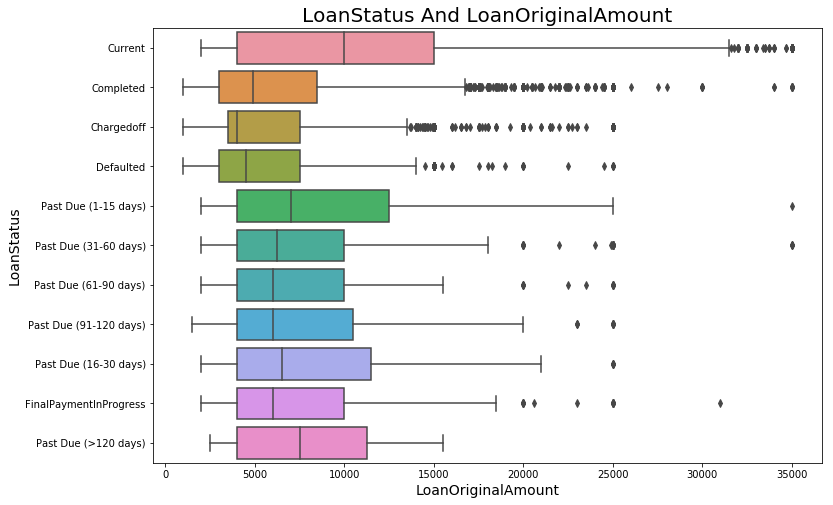

In [17]:
# Box plot
# Relationship between LoanStatus and LoanOriginalAmount
plt.figure(figsize = [12, 8])

# Call plotFunction
plotFunction(plt, 'LoanStatus And LoanOriginalAmount', 'LoanStatus', 'LoanOriginalAmount($)')
sb.boxplot(data=df, x='LoanOriginalAmount', y='LoanStatus');
plt.show()

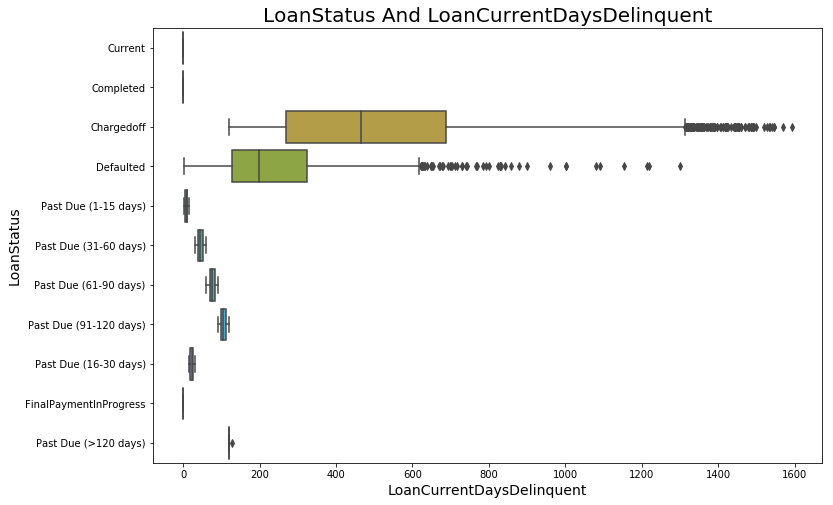

In [18]:
# Relationship between LoanStatus and LoanCurrentDaysDelinquent
plt.figure(figsize = [12, 8])

# Call plotFunction
plotFunction(plt, 'LoanStatus And LoanCurrentDaysDelinquent', 'LoanStatus', 'LoanCurrentDaysDelinquent')
sb.boxplot(data=df, x='LoanCurrentDaysDelinquent', y='LoanStatus');
plt.show()

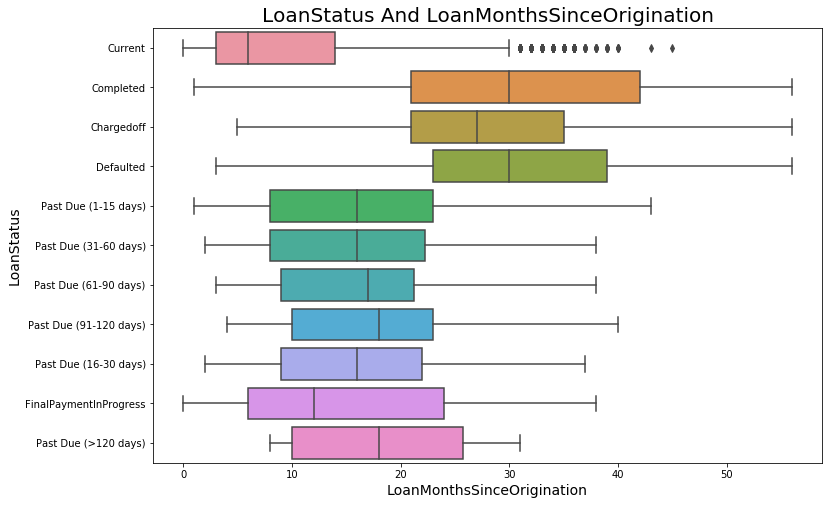

In [19]:
# Relationship between LoanStatus and LoanMonthsSinceOrigination
plt.figure(figsize = [12, 8])

# Call plotFunction
plotFunction(plt, 'LoanStatus And LoanMonthsSinceOrigination', 'LoanStatus', 'LoanMonthsSinceOrigination')
sb.boxplot(data=df, x='LoanMonthsSinceOrigination', y='LoanStatus');
plt.show()

LoanOriginalAmount  
LoanStatus data allocation with LoanOriginalAmount is pretty even  
LoanStatus = Current Q4(max) about 32000  
The remaining LoanStatus Q4(max) is in the range of 14000-21000  
Most Q2(median) are more than 5000  
LoanCurrentDaysDelinquent  
It is clear that LoanStatus = Chargedoff, Defaulted has the highest distribution compared to
the remaining LoanStatus  
Chargedoff:  
IQR = Q3 - Q1 = 700 - 300 = 400 days  
1.5IQR = 600  
Defaulted:  
IQR = Q3 - Q1 = 300 - 100 = 200 days  
1.5IQR = 300  
The remaining LoanStatus are allotted under about 150 days  
LoanMonthsSinceOrigination  
LoanStatus data allocation with LoanMonthsSinceOrigination is pretty even  
Every LoanStatus allocates data on LoanMonthsSinceOrigination  

### Relationship between LoanStatus and variable category

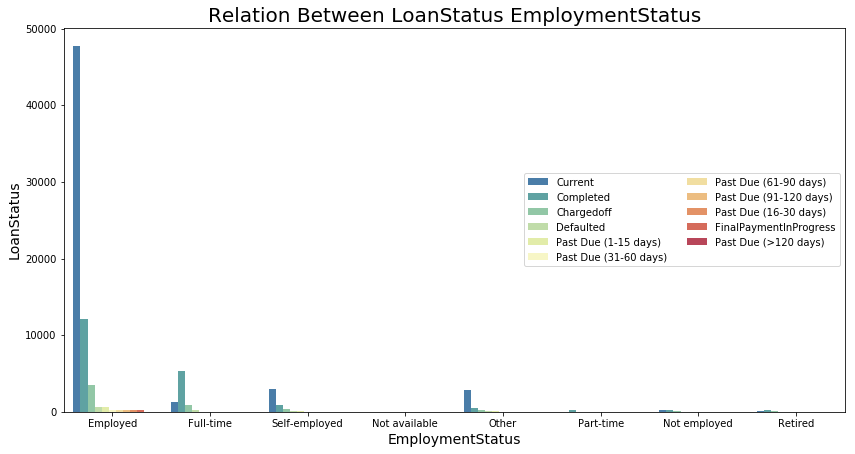

In [20]:
# Categorical Plot
plt.figure(figsize = [14, 24])

# subplot 1: LoanStatus vs EmploymentStatus
ax = plt.subplot(3, 1, 1)
sb.countplot(data = df, x = 'EmploymentStatus', hue = 'LoanStatus', palette = 'Spectral_r')
plotFunction(plt, 'Relation Between LoanStatus EmploymentStatus', 'EmploymentStatus', 'LoanStatus')
ax.legend(loc = 'center right',ncol = 2);

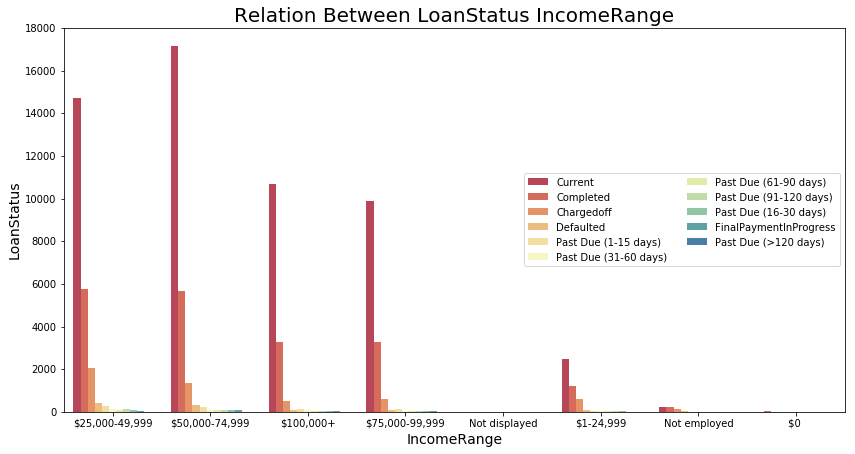

In [21]:
# subplot 2: LoanStatus vs. IncomeRange
plt.figure(figsize = [14, 24])
ax = plt.subplot(3, 1, 2)
sb.countplot(data = df, x = 'IncomeRange', hue = 'LoanStatus', palette = 'Spectral')
ax.legend(loc = 'center right',ncol = 2);
plotFunction(plt, 'Relation Between LoanStatus IncomeRange', 'IncomeRange', 'LoanStatus')

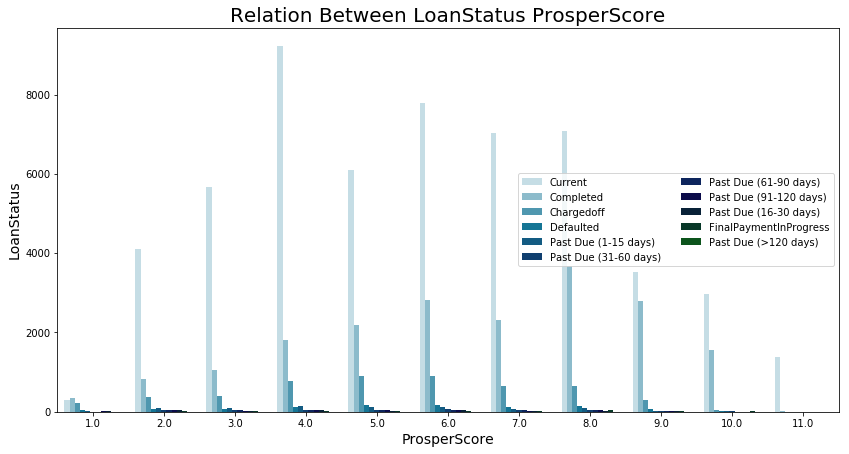

In [22]:
# subplot 3: LoanStatus vs. LoanOriginalAmount
plt.figure(figsize = [14, 24])
ax = plt.subplot(3, 1, 3)
sb.countplot(data = df, x = 'ProsperScore', hue = 'LoanStatus', palette = 'ocean_r')
ax.legend(loc = 'center right', ncol = 2)
plotFunction(plt, 'Relation Between LoanStatus ProsperScore', 'ProsperScore', 'LoanStatus')
plt.show()

**EmploymentStatus** 
The distribution is quite similar in univariate analysis    
EmploymentStatus = Employed has a very high value of LoanStatus = Current, nearly 50000/83035 total records  
**IncomeRange**  
The distribution is quite similar in univariate analysis  
Additional range of 100,000 USD+ and 75,000-99,999 USD  
They are: 11,000, 10,000 respectively for LoanStatus = Current  
**ProsperScore**  
50% of the value is on the left  
50% of the value is on the right  
It is quite strange that the values on the right > 6 (low lending risk) tend to decrease  

## (Visualization 3)
### Multivariate Exploration


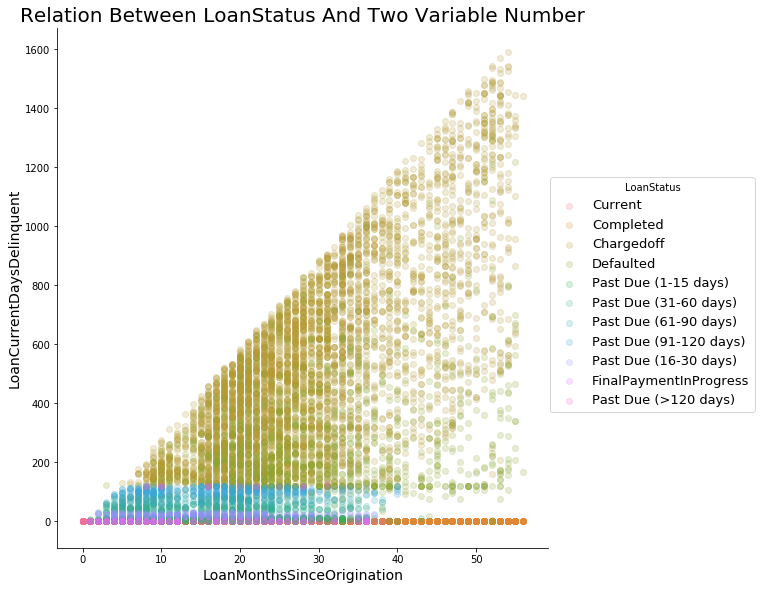

In [31]:
# Relation Between LoanStatus LoanMonthsSinceOrigination LoanCurrentDaysDelinquent
g = sb.FacetGrid(data = df, hue = 'LoanStatus', size = 8)
g.map(sb.regplot, 'LoanMonthsSinceOrigination', 'LoanCurrentDaysDelinquent',
      y_jitter = 0.02, fit_reg = False,scatter_kws = {'alpha' : 1/5}
     )

# Call plotFunction
plotFunction(plt, 'Relation Between LoanStatus And Two Variable Number', 'LoanMonthsSinceOrigination', 'LoanCurrentDaysDelinquent')
g.add_legend(prop = {'size' : 13});

LoanMonthsSinceOrigination, LoanCurrentDaysDelinquent, LoanStatus increase proportionally, When LoanMonthsSinceOrigination increases, the color of LoanStatus also changes noticeably

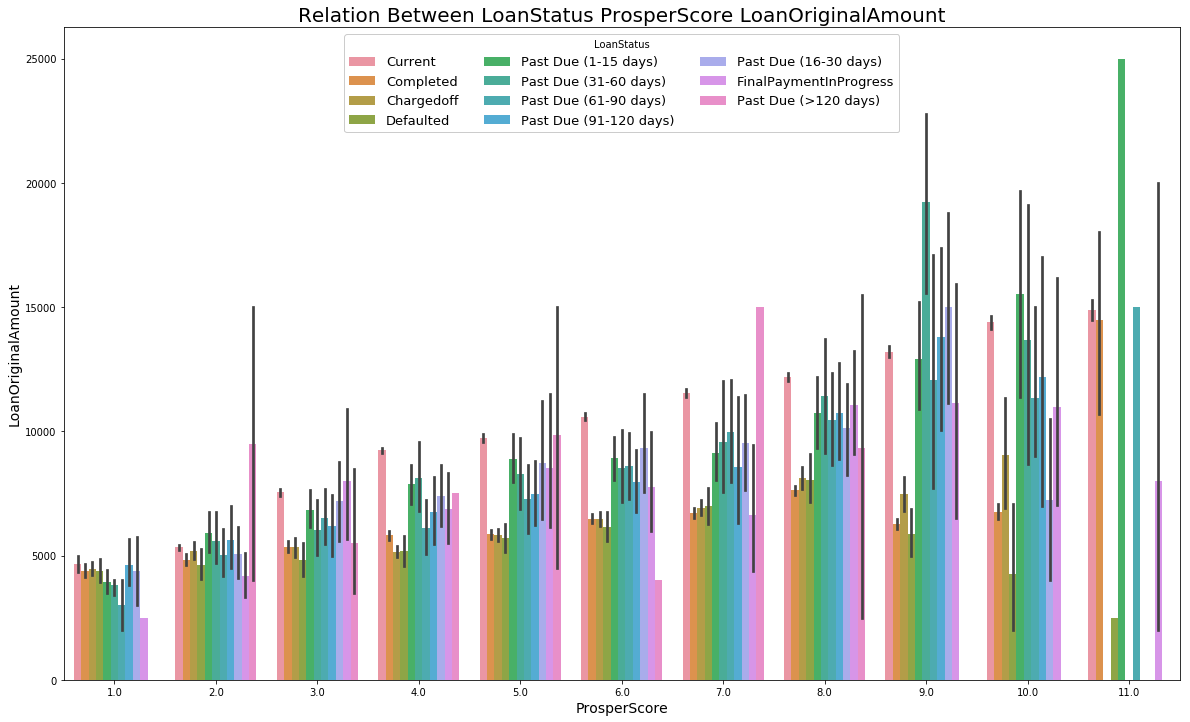

In [24]:
# Relation Between LoanStatus ProsperScore LoanOriginalAmount
plt.figure(figsize = [20, 12])
ax = sb.barplot(data = df, x = 'ProsperScore', y = 'LoanOriginalAmount', hue = 'LoanStatus')
ax.legend(loc = 'top',fontsize=13, ncol = 3, framealpha = 1, title = 'LoanStatus')

# Call plotFunction
plotFunction(plt, 'Relation Between LoanStatus ProsperScore LoanOriginalAmount', 'ProsperScore', 'LoanOriginalAmount')

All ProsperScore values have LoanStatus
It is easy to see that the higher the ProsperScore, the more LoanOriginalAmount tends to increase, which is very reasonable because
The higher the risk score (the lower the risk)

## Conclusions
I have researched and analyzed it using excel along with the data descriptor file 'Prosper Loan Data.xlsx'
to filter out the necessary information (Select relevant columns, few null values, clear data...).  
Define the number of columns to use in the project  
Clean some invalid data  
Univariate analysis  
Binary analysis  
Multivariate analysis  
All are analyzed and modeled by displaying meaningful charts, make comments after each chart.  
->All analytical views, comments from univariate have reached the final conclusion, after multivariate analysis and modeling  
**What factors affect a loan's outcome status?**  
EmploymentStatus, IncomeRange, ProsperScore, LoanOriginalAmount, LoanCurrentDaysDelinquent, LoanMonthsSinceOrigination are all related to and affect **LoanStatus**.  
In general, this is only a one-sided conclusion and it will not be entirely true, because the reality of loans in real life will be much more complicated.

In [33]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --no-input --no-prompt
# !jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 1204654 bytes to Part_II_slide_deck_template.slides.html


> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 